<!--<img width=700px; src="../img/logoUPSayPlusCDS_990.png"> -->

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduction to Pandas</big></big></big></big></b></p>

In [1]:
# show plot in jupyter notebook
%matplotlib inline

# set alias for modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set maxium display length
pd.options.display.max_rows = 8

# 1. Let's start with a showcase

#### Case 1: titanic survival data

In [2]:
# import data using pd.read_csv
df = pd.read_csv("data/titanic.csv")

In [3]:
# take a glance at the first 5 rows of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

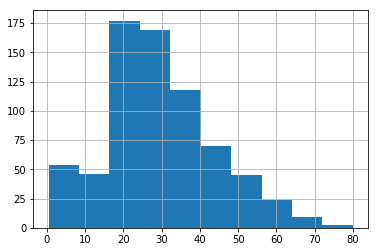

In [4]:
# select the variable ['age'] and make a histogram
df['Age'].hist()

**How does the survival rate of the passengers differ between sexes?**

In [15]:
# pass the dataframe to aggregate, still return a dataframe
# [['variable A', 'variable B']] use double square brakets to select multiple columns
a = df.groupby('Sex')[['Survived', 'SibSp']].aggregate(lambda x: x.sum() / len(x))


In [18]:
a

,Survived,SibSp
Sex,,
female,0.742038,0.694268
male,0.188908,0.429809


In [19]:
type(a)

pandas.core.frame.DataFrame

In [13]:
d = df.groupby('Sex')['Survived'].aggregate(lambda x: x.sum() / len(x))
type(d)

pandas.core.series.Series

In [11]:
c = df.groupby('Sex')['Survived'].aggregate(lambda x: x.sum() / len(x))

In [12]:
type(c)

pandas.core.series.Series

In [9]:
# the same as: group data by sex variable, slice to survived data, and pass the data to mean() function
# reutrn pd.series, like vector in r
b = df.groupby('Sex')['Survived'].mean()

In [10]:
type(b)

pandas.core.series.Series

**Or how does it differ between the different classes?**

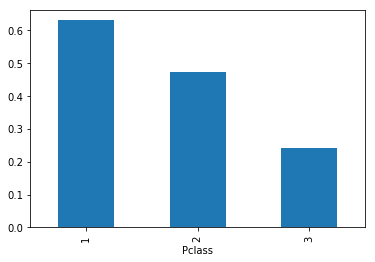

In [20]:
# make a barplot
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

All the needed functionality for the above examples will be explained throughout this tutorial.

#### Case 2: air quality measurement timeseries

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe

Starting from these hourly data for different stations:

- skiprows : Line numbers to skip (0-indexed) or number of lines to skip (int)
- index_col : int or sequence or False. Column to use as the row labels of the DataFrame.
- parse_dates : boolean or list of ints or names or list of lists or dict, default False

    * boolean. If True -> try parsing the index.
    * list of ints or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3
      each as a separate date column.
    * list of lists. e.g.  If [[1, 3]] -> combine columns 1 and 3 and parse as
      a single date column.
    * dict, e.g. {'foo' : [1, 3]} -> parse columns 1, 3 as date and call result
      'foo'

In [21]:
# read csv, specify separate mark, skip the first row, 
 
data = pd.read_csv('data/20000101_20161231-NO2.csv', 
                   sep=';', skiprows=[1], na_values=['n/d'], 
                   index_col=0, parse_dates=True)



In [22]:
data.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


to answering questions about this data in a few lines of code:

**Does the air pollution show a decreasing trend over the years?**

- data.resample: Convenience method for frequency conversion and resampling of time series.

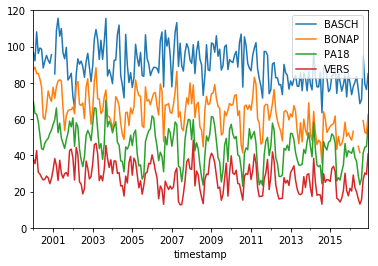

In [23]:
data['1999':].resample('M').mean().plot(ylim=[0,120])

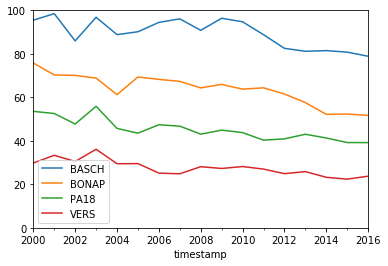

In [24]:
data['1999':].resample('A').mean().plot(ylim=[0,100])

**What is the difference in diurnal profile between weekdays and weekend?**

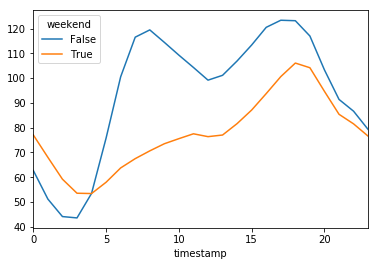

In [25]:
data['weekday'] = data.index.weekday
# select weekday fall in [5, 6]
data['weekend'] = data['weekday'].isin([5, 6])

data_weekend = data.groupby(['weekend', data.index.hour])['BASCH'].mean().unstack(level=0)
data_weekend.plot()

We will come back to these example, and build them up step by step.

# 2. Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


** When do you need pandas? **

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- 1.Import data
- 2.Clean up messy data
- 3.Explore data, gain insight into data
- 4.Process and prepare your data for analysis
- 5.Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

# 2. The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as **multiple Series object which share the same index**.


<img align="left" width=50% src="img/schema-dataframe.svg">

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


All the column share the same index

### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [27]:
# how many observationsa are there
df.index

RangeIndex(start=0, stop=891, step=1)

In [28]:
# how many variables are there
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [30]:
# the data types for each variable
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
                ...   
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object


In [41]:
df['Name'].dtypes

dtype('O')

An overview of that information can be given with the `info()` method: like `summary()` in r

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [43]:
# each row as a list, packed in an array
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ..., 
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Apart from importing your data from an external source (text file, excel, database, ..), one of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

**Note that in the IPython notebook, the dataframe will display in a rich HTML view:**

In [44]:
# create a df using dictionary, key is the column name, values are the variable value.
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [45]:
# like vector in R
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [46]:
age = df['Age']

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [47]:
age.index

RangeIndex(start=0, stop=891, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [48]:
age.values[:10]

array([ 22.,  38.,  26.,  35.,  35.,  nan,  54.,   2.,  27.,  14.])

We can access series values via the index, just like for NumPy arrays:

In [49]:
# age of the first observation
age[0]

22.0

Unlike the NumPy array, though, this index can be something other than integers:

In [50]:
# set Name varianle as index
df = df.set_index('Name')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


In [51]:
age = df['Age']
age

# new 'Name' is the index

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
                                                       ... 
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [52]:
# select value via index
age['Dooley, Mr. Patrick']

32.0

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [53]:
age * 1000

Name
Braund, Mr. Owen Harris                                22000.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38000.0
Heikkinen, Miss. Laina                                 26000.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35000.0
                                                        ...   
Graham, Miss. Margaret Edith                           19000.0
Johnston, Miss. Catherine Helen "Carrie"                   NaN
Behr, Mr. Karl Howell                                  26000.0
Dooley, Mr. Patrick                                    32000.0
Name: Age, Length: 891, dtype: float64

A range of methods:

In [54]:
age.mean()

29.69911764705882

Fancy indexing, like indexing with a list or boolean indexing:

In [55]:
# slice variable by T/F value
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

But also a lot of pandas specific methods, e.g.

In [58]:
# count the frequency for categoricial variable
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare that was paid? And the median?</li>
</ul>
</div>

In [59]:
# %load snippets/01-pandas_introduction31.py
df['Fare'].max()

512.32920000000001

In [60]:
# %load snippets/01-pandas_introduction32.py
df['Fare'].median()

14.4542

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
</ul>
</div>

In [62]:
# %load snippets/01-pandas_introduction33.py
df['Survived'].mean()

0.3838383838383838

# 3. Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

In [ ]:
#pd.read

In [ ]:
#df.to

Very powerful csv reader:

In [63]:
pd.read_csv?

Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [ ]:
df = pd.read_csv("data/titanic.csv")

In [ ]:
df.head()

<div class="alert alert-success">

<b>EXERCISE</b>: Read the `data/20000101_20161231-NO2.csv` file into a DataFrame `no2`
<br><br>
Some aspects about the file:
 <ul>
  <li>Which separator is used in the file?</li>
  <li>The second row includes unit information and should be skipped (check `skiprows` keyword)</li>
  <li>For missing values, it uses the `'n/d'` notation (check `na_values` keyword)</li>
  <li>We want to parse the 'timestamp' column as datetimes (check the `parse_dates` keyword)</li>
</ul>
</div>

In [67]:
# %load snippets/01-pandas_introduction39.py
no2 = pd.read_csv('/Users/yy2633/MA/5073ML/Week 2/pandas-tutorial-master/data/20000101_20161231-NO2.csv',
                  sep=';', skiprows = [1], na_values='n/d', parse_dates = True )

In [69]:
no2.head()

,timestamp,BASCH,BONAP,PA18,VERS
0,2000-01-01 01:00:00,108.0,NaN,65.0,47.0
1,2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2,2000-01-01 03:00:00,97.0,58.0,73.0,34.0
3,2000-01-01 04:00:00,77.0,52.0,57.0,29.0
4,2000-01-01 05:00:00,79.0,52.0,64.0,28.0


# 4. Exploration

Some useful methods:

`head` and `tail`

In [71]:
no2.head(6)

,timestamp,BASCH,BONAP,PA18,VERS
0,2000-01-01 01:00:00,108.0,NaN,65.0,47.0
1,2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2,2000-01-01 03:00:00,97.0,58.0,73.0,34.0
3,2000-01-01 04:00:00,77.0,52.0,57.0,29.0
4,2000-01-01 05:00:00,79.0,52.0,64.0,28.0
5,2000-01-01 06:00:00,67.0,48.0,64.0,37.0


In [72]:
no2.tail()

,timestamp,BASCH,BONAP,PA18,VERS
149034,2016-12-31 19:00:00,77.0,49.0,52.0,23.0
149035,2016-12-31 20:00:00,73.0,51.0,49.0,20.0
149036,2016-12-31 21:00:00,61.0,51.0,48.0,16.0
149037,2016-12-31 22:00:00,57.0,49.0,45.0,14.0
149038,2016-12-31 23:00:00,51.0,47.0,45.0,12.0


`info()`

In [73]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149039 entries, 0 to 149038
Data columns (total 5 columns):
timestamp    149039 non-null object
BASCH        139949 non-null float64
BONAP        136493 non-null float64
PA18         142259 non-null float64
VERS         143813 non-null float64
dtypes: float64(4), object(1)
memory usage: 5.7+ MB


Getting some basic summary statistics about the data with `describe`:

In [74]:
no2.describe()

,BASCH,BONAP,PA18,VERS
count,139949.000000,136493.000000,142259.000000,143813.000000
mean,89.270098,64.001714,45.104211,27.613227
std,36.772855,27.866767,23.212719,19.604953
min,4.000000,0.000000,2.000000,0.000000
25%,63.000000,44.000000,28.000000,13.000000
50%,87.000000,62.000000,42.000000,22.000000
75%,112.000000,81.000000,59.000000,38.000000
max,358.000000,345.000000,306.000000,197.000000


Quickly visualizing the data

kind : str
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot

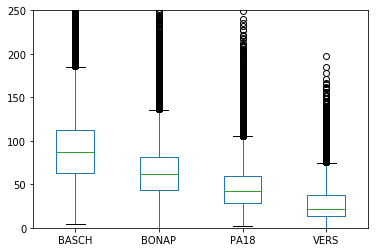

In [75]:
no2.plot(kind='box', ylim=[0,250])

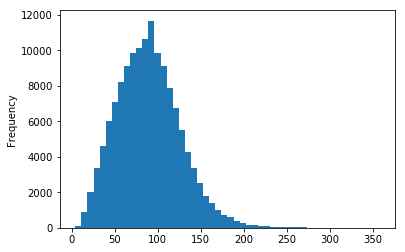

In [76]:
no2['BASCH'].plot(kind='hist', bins=50)

<div class="alert alert-success">

<b>EXERCISE</b>: 

 <ul>
  <li>Plot the age distribution of the titanic passengers</li>
</ul>
</div>

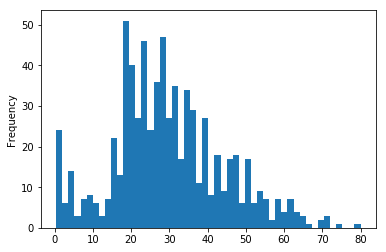

In [77]:
# %load snippets/01-pandas_introduction47.py
df['Age'].plot(kind='hist', bins=50)

The default plot (when not specifying `kind`) is a line plot of all columns:

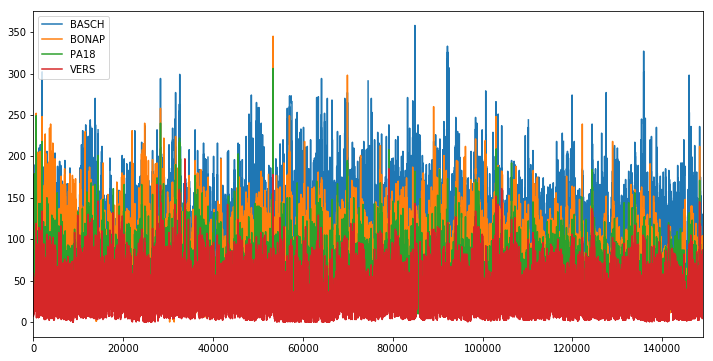

In [78]:
no2.plot(figsize=(12,6))

This does not say too much ..

We can select part of the data (eg the latest 500 data points [-500:]):

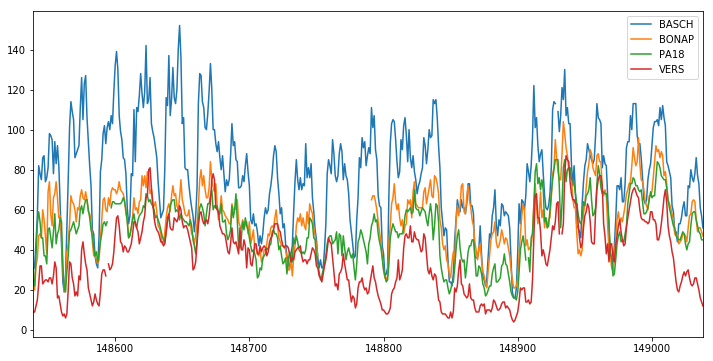

In [79]:
no2[-500:].plot(figsize=(12,6))

Or we can use some more advanced time series features -> see further in this notebook!

# 5. Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

In [80]:
df = pd.read_csv("data/titanic.csv")

### Select or Slice data
### `df[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [81]:
# select by lable
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

or multiple columns:

In [ ]:
# mutiple columns by lable
df[['Age', 'Fare']]

But, slicing accesses the rows:

In [82]:
# by location, from 10 to 15 (not included)
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can **only select from one axis* at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:

Below we can select from **row AND columns**
    
* `loc`: selection by label
* `iloc`: selection by position

In [83]:
df = df.set_index('Name')

In [84]:
# loc[row , column], return single value
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.550000000000001

In [86]:
# star : end (included)
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', 'PassengerId':'Age']

,PassengerId,Survived,Pclass,Sex,Age
Name,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0
"Saundercock, Mr. William Henry",13,0,3,male,20.0
"Andersson, Mr. Anders Johan",14,0,3,male,39.0


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [87]:
# start position : end position (Not included)
df.iloc[0:2,1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


The different indexing methods can also be used to assign data:

In [88]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [89]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [90]:
df['Fare'] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
                                                       ...  
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [91]:
df[df['Fare'] > 50]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S
"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",872,1,1,female,47.0,1,1,11751,52.5542,D35,S
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,female,56.0,0,1,11767,83.1583,C50,C


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

In [ ]:
df = pd.read_csv("data/titanic.csv")

In [97]:
df[df['Sex'] == 'male']['Age'].mean()

30.72664459161148

In [95]:
# %load snippets/01-pandas_introduction64.py
df[df['Sex'] == 'female']['Age'].mean()

27.915708812260537

In [ ]:
# %load snippets/01-pandas_introduction65.py
df.loc[df['Sex'] == 'female', 'Age'].mean()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
</ul>
</div>

In [ ]:
# %load snippets/01-pandas_introduction66.py
len(df[df['Age'] > 70])

In [107]:
len(df[df['Age'] > 70])

5

In [109]:
# %load snippets/01-pandas_introduction67.py
(df['Age'] > 70).sum()

5

# 6. The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [110]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
...,...,...
5,15,C
6,10,A
7,15,B
8,20,C


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [111]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [112]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [113]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [114]:
 # aggregate(): apply some function in the split data
df.groupby('key').aggregate(np.sum) 

,data
key,
A,15
B,30
C,45


And many more methods are available. 

In [115]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

### Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [116]:
df = pd.read_csv("data/titanic.csv")

In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average age for each sex again, but now using groupby.</li>
</ul>
</div>

In [122]:
for sex in ['male', 'female']:
    print(sex, df[df['Sex'] == sex]['Age'].mean())

male 30.72664459161148
female 27.915708812260537


In [121]:
# %load snippets/01-pandas_introduction76.py
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [124]:
df['Survived'].mean()

0.3838383838383838

In [ ]:
# %load snippets/01-pandas_introduction77.py
# df['Survived'].sum() / len(df['Survived'])
df['Survived'].mean()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [128]:
# %load snippets/01-pandas_introduction78.py
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4119601328903654

In [129]:
df.loc[df['Age'] <= 25, 'Survived'].mean()

0.4119601328903654

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

In [130]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
# %load snippets/01-pandas_introduction79.py
# df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))
df.groupby('Sex')[['Survived']].mean()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

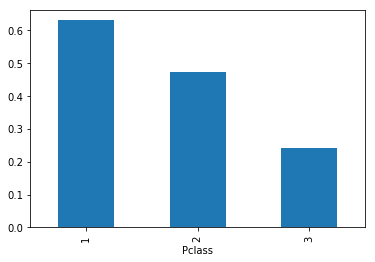

In [134]:
df.groupby('Pclass')['Survived'].mean().plot(kind = 'bar')

In [ ]:
# %load snippets/01-pandas_introduction80.py
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.</li>
</ul>
</div>

In [136]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

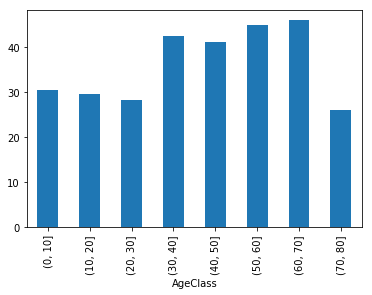

In [138]:
df.groupby('AgeClass')['Fare'].mean().plot(kind = 'bar')

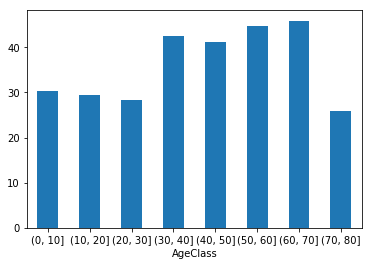

In [140]:
# %load snippets/01-pandas_introduction82.py

# rot = 0 means x-axis lable rotation degree = 0
df.groupby('AgeClass')['Fare'].mean().plot(kind='bar', rot=0)

# 7. Working with time series data

In [ ]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [ ]:
no2.index

Indexing a time series works with strings:

In [ ]:
no2["2010-01-01 09:00": "2010-01-01 12:00"]

A nice feature is "partial string" indexing, so you don't need to provide the full datetime string.

E.g. all data of January up to March 2012:

In [ ]:
no2['2012-01':'2012-03']

Time and date components can be accessed from the index:

In [ ]:
no2.index.hour

In [ ]:
no2.index.year

## Converting your time series with `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

Remember the air quality data:

In [ ]:
no2.plot()

The time series has a frequency of 1 hour. I want to change this to daily:

In [ ]:
no2.head()

In [ ]:
no2.resample('D').mean().head()

Above I take the mean, but as with `groupby` I can also specify other methods:

In [ ]:
no2.resample('D').max().head()

The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

Further exploring the data:

In [ ]:
no2.resample('M').mean().plot() # 'A'

In [ ]:
# no2['2012'].resample('D').plot()

In [ ]:
# %load snippets/01-pandas_introduction95.py

<div class="alert alert-success">

<b>EXERCISE</b>: The evolution of the yearly averages with, and the overall mean of all stations

 <ul>
  <li>Use `resample` and `plot` to plot the yearly averages for the different stations.</li>
  <li>The overall mean of all stations can be calculated by taking the mean of the different columns (`.mean(axis=1)`).</li>
</ul>
</div>

In [ ]:
# %load snippets/01-pandas_introduction96.py

<div class="alert alert-success">

<b>EXERCISE</b>: how does the *typical monthly profile* look like for the different stations?

 <ul>
  <li>Add a 'month' column to the dataframe.</li>
  <li>Group by the month to obtain the typical monthly averages over the different years.</li>
</ul>
</div>

First, we add a column to the dataframe that indicates the month (integer value of 1 to 12):

In [ ]:
# %load snippets/01-pandas_introduction97.py

Now, we can calculate the mean of each month over the different years:

In [ ]:
# %load snippets/01-pandas_introduction98.py

In [ ]:
# %load snippets/01-pandas_introduction99.py

<div class="alert alert-success">

<b>EXERCISE</b>: The typical diurnal profile for the different stations

 <ul>
  <li>Similar as for the month, you can now group by the hour of the day.</li>
</ul>
</div>

In [ ]:
# %load snippets/01-pandas_introduction100.py

<div class="alert alert-success">

<b>EXERCISE</b>: What is the difference in the typical diurnal profile between week and weekend days for the 'BASCH' station.

 <ul>
  <li>Add a column 'weekday' defining the different days in the week.</li>
  <li>Add a column 'weekend' defining if a days is in the weekend (i.e. days 5 and 6) or not (True/False).</li>
  <li>You can groupby on multiple items at the same time. In this case you would need to group by both weekend/weekday and hour of the day.</li>
</ul>
</div>

Add a column indicating the weekday:

In [ ]:
no2.index.weekday?

In [ ]:
# %load snippets/01-pandas_introduction102.py

Add a column indicating week/weekend

In [ ]:
# %load snippets/01-pandas_introduction103.py

Now we can groupby the hour of the day and the weekend (or use `pivot_table`):

In [ ]:
# %load snippets/01-pandas_introduction104.py

In [ ]:
# %load snippets/01-pandas_introduction105.py

In [ ]:
# %load snippets/01-pandas_introduction106.py

In [ ]:
# %load snippets/01-pandas_introduction107.py

<div class="alert alert-success">

<b>EXERCISE</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?

Count the number of exceedances of hourly values above the European limit 200 µg/m3 for each year and station after 2005. Make a barplot of the counts. Add an horizontal line indicating the maximum number of exceedances (which is 18) allowed per year?
<br><br>

Hints:

 <ul>
  <li>Create a new DataFrame, called `exceedances`, (with boolean values) indicating if the threshold is exceeded or not</li>
  <li>Remember that the sum of True values can be used to count elements. Do this using groupby for each year.</li>
  <li>Adding a horizontal line can be done with the matplotlib function `ax.axhline`.</li>
</ul>
</div>

In [ ]:
# re-reading the data to have a clean version
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [ ]:
# %load snippets/01-pandas_introduction109.py

In [ ]:
# %load snippets/01-pandas_introduction110.py

In [ ]:
# %load snippets/01-pandas_introduction111.py

# 9. What I didn't talk about

- Concatenating data: `pd.concat`
- Merging and joining data: `pd.merge`
- Reshaping data: `pivot_table`, `melt`, `stack`, `unstack`
- Working with missing data: `isnull`, `dropna`, `interpolate`, ...
- ...


## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/

* Books

    * "Python for Data Analysis" by Wes McKinney
    * "Python Data Science Handbook" by Jake VanderPlas

* Tutorials (many good online tutorials!)

  * https://github.com/jorisvandenbossche/pandas-tutorial
  * https://github.com/brandon-rhodes/pycon-pandas-tutorial

* Tom Augspurger's blog

  * https://tomaugspurger.github.io/modern-1.html